In [56]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import data
from skimage.color import rgb2gray
from PIL import Image

In [57]:
import os
total_width = 0
total_height = 0
num_images = 0
folder_path = 'C:/Users/ritti/OneDrive/Desktop/Mini Project/Dataset/IIITB-FACES'

for folder_name in os.listdir(folder_path):
    fld = os.path.join(folder_path, folder_name)

    for image_name in os.listdir(fld):
        image_path = os.path.join(fld, image_name)
    
        # image_array = plt.imread(image_path)
        image = Image.open(image_path)
        # Get the dimensions of the image
        width, height = image.size
        # Accumulate the width and height for calculating the average
        total_width += width
        total_height += height
        num_images += 1
                
print(total_width/num_images)
print(total_height/num_images)

499.9266826923077
499.30408653846155


In [58]:
folder_path = 'C:/Users/ritti/OneDrive/Desktop/Mini Project/Dataset/IIITB-FACES'
# List all items (files and subdirectories) in the folder
data = []
test = []
items = os.listdir(folder_path)

for folder_name in items:
    fld = os.path.join(folder_path, folder_name)
    count  = 0

    for image_name in os.listdir(fld):
        image_path = os.path.join(fld, image_name)
            
        # image_array = plt.imread(image_path)
        image = Image.open(image_path)
        # Resize the image
        new_size = (300, 300)  # Specify the new dimensions
        resized_image = image.resize(new_size)
        # Convert RGB to grayscale
        gray_image = resized_image.convert('L')
        count +=1
        if count<=2:
            test.append([np.ravel(np.array(gray_image)), folder_name])
        else:
            data.append([np.ravel(np.array(gray_image)), folder_name])

In [59]:
print(len(data))
print(len(test))

734
98


FINDING THE MEAN FACE

In [60]:
# Extract the vectors from the inner lists
vectors = [inner_list[0] for inner_list in data]
# Calculate the mean of all the vectors
mean_vector = np.mean(vectors, axis=0)

In [61]:
mean_vector

array([182.72615804, 182.41008174, 182.1253406 , ..., 105.1852861 ,
       105.85831063, 107.01771117])

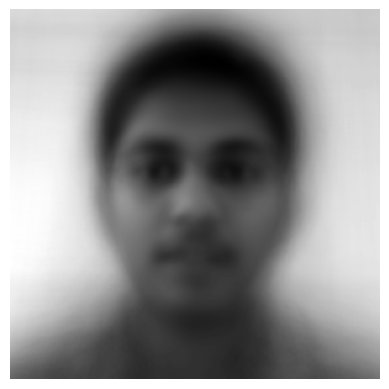

In [62]:
# Reshape the 1D array into a 2D matrix
grayscale_image = mean_vector.reshape(300, 300)
# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

Subtracting mean face from all the original images

In [63]:
resultant_vectors = vectors-mean_vector

In [64]:
resultant_vectors.shape

(734, 90000)

Creation Of Co_Variance Matrix

In [65]:
#stacking the images column wise,i.e. each column represents an image
# matrix = resultant_vectors.T
# matrix.shape

In [66]:
covariance_matrix = np.cov(resultant_vectors) 

In [67]:
covariance_matrix.shape

(734, 734)

In [68]:
covariance_matrix

array([[2947.82864172, 2495.49048057, 2338.68993161, ..., -228.07023289,
        -148.26048692, -143.59564485],
       [2495.49048057, 3056.91887778, 2781.87508978, ..., -289.73239438,
        -243.17957425, -207.16124853],
       [2338.68993161, 2781.87508978, 3231.61700978, ..., -145.94273916,
        -125.24552638,  -69.34569095],
       ...,
       [-228.07023289, -289.73239438, -145.94273916, ..., 2598.08339616,
        2280.237201  , 2528.75936149],
       [-148.26048692, -243.17957425, -125.24552638, ..., 2280.237201  ,
        2537.66620407, 2273.11245321],
       [-143.59564485, -207.16124853,  -69.34569095, ..., 2528.75936149,
        2273.11245321, 2684.21292057]])

Finding The Eigen Faces

In [69]:

# Step 1: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 2: Select Top k Eigenvectors
k = 200  # Number of top eigenvectors to keep
top_indices = np.argsort(eigenvalues)[::-1][:k]  # Indices of top k eigenvalues 1``
top_eigenvectors = eigenvectors[:, top_indices]

In [70]:

# from sklearn.decomposition import PCA


# # Number of top k eigenvectors you want to extract
# k = 30

# # Instantiate and fit the PCA model
# pca = PCA(n_components=k)
# pca.fit(covariance_matrix)

# # Extract the top k eigenvectors
# top_k_eigenvectors = pca.components_

# print("Top", k, "eigenvectors:")
# print(top_k_eigenvectors)


In [71]:
top_eigenvectors.shape

(734, 200)

In [72]:
#Eigen faces matrix, where each column represents an eigen vector
eigen_faces = (resultant_vectors.T)@top_eigenvectors

In [73]:
eigen_faces.shape

(90000, 200)

Normalizing The Eigen Faces

In [74]:
def normalize_columns(matrix):
    normalized_matrix = np.copy(matrix)
    num_columns = matrix.shape[1]  # Get the number of columns in the matrix
    
    for col in range(num_columns):
        column_vector = matrix[:, col]  # Get the current column vector
        magnitude = np.linalg.norm(column_vector)  # Calculate the magnitude
        
        if magnitude != 0:  # Avoid division by zero
            normalized_matrix[:, col] = column_vector / magnitude
        
    return normalized_matrix

In [75]:
normalized_eigen_faces = normalize_columns(eigen_faces)

In [76]:
normalized_eigen_faces .shape

(90000, 200)

In [77]:
eigen_faces

array([[-885.95091129,  -76.46699717,  401.13021505, ...,  -16.00761569,
          -1.31087046,    4.61013864],
       [-884.88510295,  -65.26106156,  393.91959418, ...,  -17.85006433,
          -1.0727548 ,   -3.10862653],
       [-880.9439402 ,  -59.26126111,  387.04565587, ...,  -22.35045782,
          -3.42407725,  -14.13798851],
       ...,
       [1009.65971159,  684.44052178,  -76.72521159, ...,  -10.53456535,
           5.45612867,   21.91733382],
       [1001.00121225,  685.28801484,  -98.29115737, ...,  -32.23926394,
          15.3870749 ,   -4.41183008],
       [ 995.14090482,  711.40138605,  -98.82782422, ...,  -58.6026961 ,
          44.68532546,  -26.75329867]])

In [78]:
normalized_eigen_faces

array([[-0.00471116, -0.00056066,  0.00327786, ..., -0.00199827,
        -0.00017465,  0.00059497],
       [-0.0047055 , -0.00047849,  0.00321894, ..., -0.00222827,
        -0.00014292, -0.00040119],
       [-0.00468454, -0.0004345 ,  0.00316277, ..., -0.00279006,
        -0.00045619, -0.00182461],
       ...,
       [ 0.005369  ,  0.00501832, -0.00062697, ..., -0.00131506,
         0.00072692,  0.00282859],
       [ 0.00532296,  0.00502454, -0.00080319, ..., -0.00402451,
         0.00205003, -0.00056938],
       [ 0.0052918 ,  0.005216  , -0.00080758, ..., -0.00731552,
         0.00595347, -0.00345271]])

Finding The Weights For Each Image

In [79]:
weights = resultant_vectors@normalized_eigen_faces

In [80]:
weights.shape  #each row  represents a weigth vector for an image 

(734, 200)

FINDING THE THRESOLD

In [81]:
def euclidean_norm(vector):
    return np.sqrt(np.sum(vector**2))

def highest_euclidean_norm(matrix):
    max_norm = 0
    num_vectors = matrix.shape[0]

    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            norm = euclidean_norm(matrix[i] - matrix[j])
            max_norm = max(max_norm, norm)

    return max_norm

In [82]:
thresold = highest_euclidean_norm(weights)/2
thresold

46512.837964194085

TESTING

In [83]:
len(test)

98

In [84]:
test[0][0].shape

(90000,)

In [85]:
test_vectors = [inner_list[0] for inner_list in test]

In [86]:
resultant_test_vectors = test_vectors-mean_vector

In [87]:
resultant_test_vectors.shape

(98, 90000)

In [88]:
test_weights = resultant_test_vectors@normalized_eigen_faces

In [89]:
test_weights.shape

(98, 200)

In [90]:
def find_closest_vector(train, test,thresold,data):
    norms = np.linalg.norm(train - test, axis=1)  # Calculate Euclidean norms
    if min(norms)<= thresold:
        min_index = np.argmin(norms)  # Find the index of the minimum norm
        return data[min_index][1]
    else:
        return "NA"

closest_index = find_closest_vector(weights, test_weights[9],thresold,data)
print("Index of the closest vector:", closest_index)

Index of the closest vector: IMT2012033


In [91]:
test[9][1]

'IMT2012033'

Finding Accuracy

In [92]:
predicted = []
ground_truth = [] 
for i in range(len(test_weights)):
    predicted.append(find_closest_vector(weights, test_weights[i],thresold,data))
    ground_truth.append(test[i][1])
    
    

In [93]:
print(len(predicted))
print(len(ground_truth))

98
98


In [94]:
result = np.array(predicted) == np.array(ground_truth)
result = result.astype(int)  # Convert boolean array to integer array (0s and 1s)

print(result)

[0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [95]:
count = 0
for i in result:
    if i==1:
        count+=1
print(count/len(result))

0.8163265306122449


USING SKLEARN PCA FUNCTION

In [96]:
import os
folder_path = 'C:/Users/ritti/OneDrive/Desktop/Mini Project/Dataset/IIITB-FACES'
# List all items (files and subdirectories) in the folder
data = []
test = []
items = os.listdir(folder_path)

for folder_name in items:
    fld = os.path.join(folder_path, folder_name)
    count  = 0

    for image_name in os.listdir(fld):
        image_path = os.path.join(fld, image_name)
            
        # image_array = plt.imread(image_path)
        image = Image.open(image_path)
        # Resize the image
        new_size = (256, 256)  # Specify the new dimensions
        resized_image = image.resize(new_size)
        # Convert RGB to grayscale
        gray_image = resized_image.convert('L')
        count +=1
        if count<=2:
            test.append([np.ravel(np.array(gray_image)), folder_name])
        else:
            data.append([np.ravel(np.array(gray_image)), folder_name])

Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
# Assuming X is your data matrix
# Extract the vectors from the inner lists
train_vectors = [inner_list[0] for inner_list in data]
test_vectors = [inner_list[0] for inner_list in test]
scaler = StandardScaler()
scaler = scaler.fit(train_vectors)

In [98]:
scaled_X_train = scaler.transform(train_vectors)
scaled_X_test = scaler.transform(test_vectors)

Eigen Faces Using PCA

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200, svd_solver ='randomized',whiten = True).fit(scaled_X_train)
X_train_pca = pca.transform(scaled_X_train)
X_test_pca = pca.transform(scaled_X_test)

In [100]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(734, 200)
(98, 200)


TESTING

In [101]:
def euclidean_norm(vector):
    return np.sqrt(np.sum(vector**2))

def highest_euclidean_norm(matrix):
    max_norm = 0
    num_vectors = matrix.shape[0]

    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            norm = euclidean_norm(matrix[i] - matrix[j])
            max_norm = max(max_norm, norm)

    return max_norm

In [102]:
thresold = highest_euclidean_norm(X_train_pca)/2
thresold

17.768996812072512

In [103]:
def find_closest_vector(train, test,thresold,data):
    norms = np.linalg.norm(train - test, axis=1)  # Calculate Euclidean norms
    if min(norms)<= thresold:
        min_index = np.argmin(norms)  # Find the index of the minimum norm
        return data[min_index][1]
    else:
        return "NA"

FINDING ACCURACY

In [104]:
predicted = []
ground_truth = [] 
for i in range(len(X_test_pca)):
    predicted.append(find_closest_vector(X_train_pca, X_test_pca[i],thresold,data))
    ground_truth.append(test[i][1])

In [105]:
result = np.array(predicted) == np.array(ground_truth)
result = result.astype(int)  # Convert boolean array to integer array (0s and 1s)

print(result)

[0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1]


In [106]:
count = 0
for i in result:
    if i==1:
        count+=1
print(count/len(result))

0.7959183673469388
